<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей:-DecisionTreeClassifier" data-toc-modified-id="Обучение-моделей:-DecisionTreeClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей: DecisionTreeClassifier</a></span></li><li><span><a href="#Обучение-моделей:-RandomForestClassifier" data-toc-modified-id="Обучение-моделей:-RandomForestClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обучение моделей: RandomForestClassifier</a></span></li><li><span><a href="#Обучение-моделей:-LogisticRegression" data-toc-modified-id="Обучение-моделей:-LogisticRegression-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обучение моделей: LogisticRegression</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Устранение-дисбаланса-методом-upsampling-и-downsampling" data-toc-modified-id="Устранение-дисбаланса-методом-upsampling-и-downsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Устранение дисбаланса методом upsampling и downsampling</a></span></li><li><span><a href="#Устранение-дисбаланса-методом-подбора-порога-вероятности-класса" data-toc-modified-id="Устранение-дисбаланса-методом-подбора-порога-вероятности-класса-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Устранение дисбаланса методом подбора порога вероятности класса</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Введение

Цель проекта - выявление клиентов, которые могут уйти из банка в ближайшее время, для того чтобы вовремя предпринять меры по их удержанию. <br><br>
В проекте мы предпримем следующие шаги:<br>
1. Проведем первичный анализ и подготовку данных (датасет /datasets/Churn.csv ).<br>
2. Обучим модель на данных без учета балансировки классов <br>
3. Обучим модель с учетом балансировки классов  и сравним результаты <br>
4. Обучим модели различных алгоритмов с различными гиперпараметрами, чтобы выбрать наилучшую. Ключевая метрика -  F1-мера, в связке с AUC-ROC. <br>
5. Проведем финальное тестирование и сравним прогноз с таргетом с помощью ключевой метрики. <br>

## Подготовка данных

In [1]:
# импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.info() # обзор данных о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.head() # обзор верхних строк таблицы

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Датасет содержит 10000 строк (объектов), вполне достаточно для того чтобы иметь достаточно репрезентативные данные для трейновой, валидационной и тестовой выборки. <br>
Все данные заполнены, кроме столбца Tenure ("Сколько лет человек является клиентом банка"), необходимо исследовать этот столбец и, при возможности, заполнить его.<br>
Также необходимо избавиться от дубликатов, если они есть.

In [5]:
# выявление дубликатов
data.duplicated().sum()

0

In [6]:
# изучение столбца Tenure
data[data['Tenure'].isna() ==True].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,909.000000,9.090000e+02,909.000000,909.000000,0.0,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,4866.386139,1.568981e+07,648.451045,38.647965,NaN,76117.341474,1.530253,0.710671,0.510451,99180.389373,0.201320
std,2909.604343,7.511225e+04,99.079381,9.785438,NaN,63105.690715,0.588452,0.453701,0.500166,56378.063765,0.401207
min,31.000000,1.556581e+07,359.000000,18.000000,NaN,0.000000,1.000000,0.000000,0.000000,106.670000,0.000000
25%,2311.000000,1.562658e+07,580.000000,32.000000,NaN,0.000000,1.000000,0.000000,0.000000,49872.330000,0.000000
50%,4887.000000,1.568687e+07,647.000000,37.000000,NaN,96674.550000,1.000000,1.000000,1.000000,99444.020000,0.000000
75%,7306.000000,1.575680e+07,718.000000,43.000000,NaN,128554.980000,2.000000,1.000000,1.000000,145759.700000,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,NaN,206663.750000,4.000000,1.000000,1.000000,199390.450000,1.000000


Никаких значительных закономерностей среди этих строк не замечено. Эти клиенты не являются ни неактивными клиентами (среднее значение IsActiveMember = 0,5, значит встречаются как 0, так и 1 в равной пропорции), ни исключительно владельцами карт (0,7), ни клиентами без продуктов (среднее кол0во 1,53). <br>
Скорее всего, появление Nan в этом столбце связано с техническими причинами. Можно заменить это значение на медианное для столбца.

In [7]:
data['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

In [8]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

In [9]:
data['Tenure'].describe()

count    10000.00000
mean         4.99790
std          2.76001
min          0.00000
25%          3.00000
50%          5.00000
75%          7.00000
max         10.00000
Name: Tenure, dtype: float64

## Исследование задачи

### Подготовка данных

Для начала необходимо подготовить данные для модели: <br>
1. исследовать баланс классов <br>
2. подготовить столбцы: избавиться от ненужных, преобразовать категориальные признаки, масштабировать числовые столбцы <br>
3. разделить выборку на трейновую, тестовую и валидационную (соотношение 3:1:1) <br>

In [10]:
# исследуем баланс классов в датасете
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

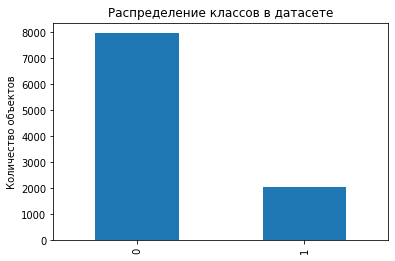

In [11]:
data['Exited'].value_counts().plot(kind ='bar', title = 'Распределение классов в датасете')
plt.ylabel('Количество объектов');

Мы видим, что классы несбалансированы, около 80% целевого признака - 0 (остались), а 20% - 1 (ушли). Это должно учитываться как при разделении выборок, так и при обучении и тестировании модели. <br>
Но для начала попробуем обучить модель без учета дисбаланса классов.

In [12]:
# подготовим данные
# для начала избавимся от столбцов, которые нам будут мешать для построения алгоритма - RowNumber, Surname & CustomerId
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1)

In [13]:
# преобразуем категориальные признаки методом прямого кодирования
data = pd.get_dummies(data, drop_first = True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
# разделим датасет на данные и целевой признак, а так же на трейновую, валидационную и тестовую выборки
features = data.drop('Exited', axis =1)
target = data['Exited']
features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                              test_size = 0.4, 
                                                                              random_state = 12345,
                                                                             stratify = target)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, 
                                                                              test_size = 0.5, 
                                                                              random_state = 12345,
                                                                            stratify = target_valid)

In [15]:
# масштабируем числовые переменные
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_train.head()

/tmp/ipykernel_210/526171115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2837,-1.040434,0.953312,6.0,0.774657,1,0,1,-0.119110,1,0,0
9925,0.454006,-0.095244,5.0,1.910540,1,1,1,-0.258658,0,0,0
8746,0.103585,-0.476537,8.0,0.481608,2,0,1,1.422836,0,0,1
660,-0.184996,0.190726,5.0,0.088439,1,1,1,-1.160427,1,0,0
3610,-0.720933,1.620574,1.0,0.879129,1,1,0,0.113236,0,0,0


### Обучение моделей: DecisionTreeClassifier

Необходимо обучить несколько моделей, подходящих к задаче моделирования категориальных данных, и сравнить ключевую метрику по разным моделям (F1-мера), чтобы выявить наилучшую. Начнем с модели DecisionTreeClassifier.

In [16]:
graph_f1 = []
graph_roc=[]
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 12345)
    model.fit(features_train, target_train)
    predict_valid = model.predict(features_valid)
    f1_valid = f1_score(target_valid, predict_valid)
    auc_score = roc_auc_score(target_valid, model.predict(features_valid))
    graph_f1.append(f1_valid)
    graph_roc.append(auc_score)
    print(f'Depth: {max_depth}, F1: {round(f1_valid,4)}, ROC-AUC: {round(auc_score, 4)}')

Depth: 2, F1: 0.5203, ROC-AUC: 0.6876
Depth: 3, F1: 0.5376, ROC-AUC: 0.6972
Depth: 4, F1: 0.5206, ROC-AUC: 0.6828
Depth: 5, F1: 0.5455, ROC-AUC: 0.6945
Depth: 6, F1: 0.5788, ROC-AUC: 0.7149
Depth: 7, F1: 0.5925, ROC-AUC: 0.7264
Depth: 8, F1: 0.5601, ROC-AUC: 0.7051
Depth: 9, F1: 0.5492, ROC-AUC: 0.7022
Depth: 10, F1: 0.5462, ROC-AUC: 0.7053
Depth: 11, F1: 0.5422, ROC-AUC: 0.7028
Depth: 12, F1: 0.5518, ROC-AUC: 0.7104
Depth: 13, F1: 0.5443, ROC-AUC: 0.7087
Depth: 14, F1: 0.505, ROC-AUC: 0.6876
Depth: 15, F1: 0.5253, ROC-AUC: 0.6996
Depth: 16, F1: 0.5135, ROC-AUC: 0.6943
Depth: 17, F1: 0.5407, ROC-AUC: 0.7109
Depth: 18, F1: 0.5243, ROC-AUC: 0.7019
Depth: 19, F1: 0.5205, ROC-AUC: 0.7
Depth: 20, F1: 0.503, ROC-AUC: 0.6895


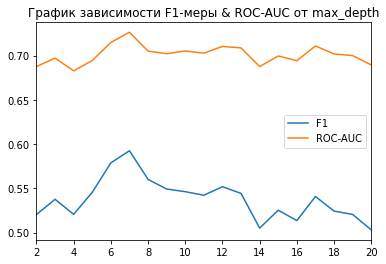

In [17]:
plt.plot(range(2,21), graph_f1)
plt.title('График зависимости F1-меры & ROC-AUC от max_depth')
plt.xlim(2, 20)
plt.plot(range(2, 21), graph_roc)
plt.legend({'ROC-AUC', 'F1'});

DecisionTreeClassifier лучше всего прогнозирует данные при max_depth = 7, F1-мера, равная 0,59, достаточно высока и удовлетворяет условиям (0,59). ROC-AUC также максимальный при глубине 7 и соотвествует значению 0,72. 

### Обучение моделей: RandomForestClassifier

In [18]:
graph_f1 = []
graph_roc= []
for n_est in range(10, 201, 10):    
    model = RandomForestClassifier(n_estimators = n_est, random_state = 12345)
    model.fit(features_train, target_train)
    predict_valid = model.predict(features_valid)
    f1_valid = f1_score(target_valid, predict_valid)
    auc_score = roc_auc_score(target_valid, model.predict(features_valid))
    graph_f1.append(f1_valid)
    graph_roc.append(auc_score)
    print(f'Estimators: {n_est}, F1: {round(f1_valid,4)}, ROC-AUC: {round(auc_score, 4)}')

Estimators: 10, F1: 0.5714, ROC-AUC: 0.7136
Estimators: 20, F1: 0.5997, ROC-AUC: 0.728
Estimators: 30, F1: 0.6053, ROC-AUC: 0.732
Estimators: 40, F1: 0.6026, ROC-AUC: 0.7311
Estimators: 50, F1: 0.5971, ROC-AUC: 0.7271
Estimators: 60, F1: 0.6009, ROC-AUC: 0.729
Estimators: 70, F1: 0.597, ROC-AUC: 0.7256
Estimators: 80, F1: 0.6003, ROC-AUC: 0.7278
Estimators: 90, F1: 0.6068, ROC-AUC: 0.732
Estimators: 100, F1: 0.6127, ROC-AUC: 0.7351
Estimators: 110, F1: 0.6106, ROC-AUC: 0.7339
Estimators: 120, F1: 0.6095, ROC-AUC: 0.733
Estimators: 130, F1: 0.6053, ROC-AUC: 0.7305
Estimators: 140, F1: 0.6092, ROC-AUC: 0.7324
Estimators: 150, F1: 0.6024, ROC-AUC: 0.729
Estimators: 160, F1: 0.603, ROC-AUC: 0.7287
Estimators: 170, F1: 0.6009, ROC-AUC: 0.7275
Estimators: 180, F1: 0.603, ROC-AUC: 0.7287
Estimators: 190, F1: 0.5991, ROC-AUC: 0.7269
Estimators: 200, F1: 0.6024, ROC-AUC: 0.729


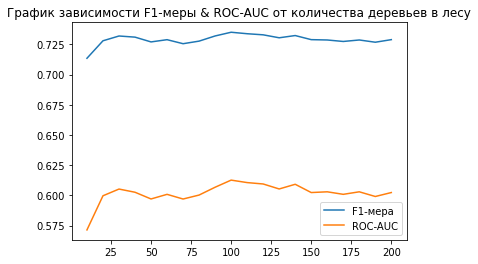

In [19]:
plt.plot(range(10, 201, 10), graph_roc)
plt.plot(range(10, 201, 10), graph_f1)
plt.title('График зависимости F1-меры & ROC-AUC от количества деревьев в лесу')
plt.legend({'F1-мера', 'ROC-AUC'});

Random Forest дает стабильный результат в районе F1 = 0,6 на валидационной выборке при любом количестве эстиматоров; в целом, этот результат лучше, чем у Decision Tree. Об этом же говорит и ROC-AUC в районе 0,73 (протви 0,72 в максимальном резульатате Decision Tree).

### Обучение моделей: LogisticRegression

Изучим результаты Логистической регрессии при различных вариантах параметров "C" & "Intercept scaling", а для лучшей визуализации построим хитмэп.

intercept_scaling: 0.1 C-parameter: 0.1, F1: 0.3327, ROC-AUC: 0.5958
intercept_scaling: 0.1 C-parameter: 0.3, F1: 0.3333, ROC-AUC: 0.5957
intercept_scaling: 0.1 C-parameter: 0.5, F1: 0.331, ROC-AUC: 0.5948
intercept_scaling: 0.1 C-parameter: 0.7, F1: 0.331, ROC-AUC: 0.5948
intercept_scaling: 0.1 C-parameter: 0.9, F1: 0.328, ROC-AUC: 0.5936
intercept_scaling: 0.3 C-parameter: 0.1, F1: 0.3213, ROC-AUC: 0.5912
intercept_scaling: 0.3 C-parameter: 0.3, F1: 0.3194, ROC-AUC: 0.5906
intercept_scaling: 0.3 C-parameter: 0.5, F1: 0.3158, ROC-AUC: 0.589
intercept_scaling: 0.3 C-parameter: 0.7, F1: 0.3164, ROC-AUC: 0.5893
intercept_scaling: 0.3 C-parameter: 0.9, F1: 0.3194, ROC-AUC: 0.5906
intercept_scaling: 0.5 C-parameter: 0.1, F1: 0.3127, ROC-AUC: 0.5878
intercept_scaling: 0.5 C-parameter: 0.3, F1: 0.3077, ROC-AUC: 0.586
intercept_scaling: 0.5 C-parameter: 0.5, F1: 0.3108, ROC-AUC: 0.5872
intercept_scaling: 0.5 C-parameter: 0.7, F1: 0.3102, ROC-AUC: 0.5869
intercept_scaling: 0.5 C-parameter: 0.9

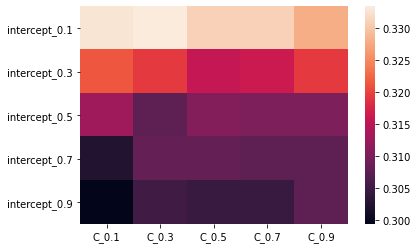

In [20]:
heatmap_graph = pd.DataFrame(columns = [0.1, 0.3, 0.5, 0.7, 0.9], index = [0.1, 0.3, 0.5, 0.7, 0.9])

for intercept in [0.1, 0.3, 0.5, 0.7, 0.9]:
    for c_param in [0.1, 0.3, 0.5, 0.7, 0.9]:
        model = LogisticRegression(C=c_param, intercept_scaling = intercept, solver='liblinear', random_state = 12345)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        precision = precision_score(target_valid, predicted_valid) 
        recall = recall_score(target_valid, predicted_valid) 
        f1_valid = f1_score(target_valid, predicted_valid) 
        auc_score = roc_auc_score(target_valid, predicted_valid) 
        heatmap_graph.loc[intercept, c_param] = f1_valid
        print(f'intercept_scaling: {round(intercept, 2)} C-parameter: {round(c_param, 2)}, F1: {round(f1_valid,4)}, ROC-AUC: {round(auc_score, 4)}')
        
heatmap_graph = heatmap_graph.astype('float')
heatmap_graph.index = ['intercept_0.1', 'intercept_0.3', 'intercept_0.5', 'intercept_0.7', 'intercept_0.9']
heatmap_graph.columns = ['C_0.1', 'C_0.3', 'C_0.5', 'C_0.7', 'C_0.9']
sns.heatmap(heatmap_graph);

Мы видим, что Логистическая регрессия подходит под наши потребности еще меньше, т.к. ключевая метрика не превышает 0,33, даже при оптимальном сочетании гиперпараметров (intercept scaling = 0.1, "C" = 0.3). <br>
Можем отбросить эту модель для дальнейших исследований.

## Борьба с дисбалансом

### Устранение дисбаланса методом upsampling и downsampling

Ранее в пункте 2 мы выявили дисбаланс классов в следующей пропорции: 80:20.
Чтобы сбалансировать классы, необходимо уравнять пропорции и привести их примерно к 50:50. <br>
Попробуем сбалансировать классы методом Upsampling.

In [21]:
# увеличим кол-во объектов с классом 1 методом upsampling
features_one = features_train[target_train==1]
features_zero = features_train[target_train ==0]
features_one.shape
target_one = target_train[target_train ==1]
target_zero = target_train[target_train == 0]

features_upsampled = pd.concat([features_one]*4 +[features_zero])
features_upsampled.shape
target_upsampled = pd.concat([target_one]*4 +[target_zero])
target_upsampled.shape

features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
features_upsampled.shape

(9666, 11)

Для сравнения сделаем также балансировку методом Downsampling.

In [22]:
features_downsampled = pd.concat([features_one]+[features_zero.sample(frac = 0.25, random_state= 12345)])
features_downsampled.shape
target_downsampled = pd.concat([target_one] +[target_zero.sample(frac=0.25, random_state =12345)])
target_downsampled.shape

features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
features_downsampled.shape

(2416, 11)

Проверим, как на валидационной выборке работают модели при сбалансированных классах.

In [23]:
# Decision Tree Classifier
graph_f1_up = []
graph_roc_up =[]
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 12345)
    model.fit(features_upsampled, target_upsampled)
    predict_valid = model.predict(features_valid)
    f1_valid = f1_score(target_valid, predict_valid)
    auc_score = roc_auc_score(target_valid, model.predict(features_valid))
    graph_f1_up.append(f1_valid)
    graph_roc_up.append(auc_score)
    print(f'Depth: {max_depth}, F1: {round(f1_valid,4)}, ROC-AUC: {round(auc_score, 4)}')


Depth: 2, F1: 0.498, ROC-AUC: 0.7152
Depth: 3, F1: 0.498, ROC-AUC: 0.7152
Depth: 4, F1: 0.5609, ROC-AUC: 0.7595
Depth: 5, F1: 0.5546, ROC-AUC: 0.7665
Depth: 6, F1: 0.5759, ROC-AUC: 0.7677
Depth: 7, F1: 0.5725, ROC-AUC: 0.7679
Depth: 8, F1: 0.5477, ROC-AUC: 0.7475
Depth: 9, F1: 0.5397, ROC-AUC: 0.7315
Depth: 10, F1: 0.5371, ROC-AUC: 0.7259
Depth: 11, F1: 0.5314, ROC-AUC: 0.7189
Depth: 12, F1: 0.5131, ROC-AUC: 0.7054
Depth: 13, F1: 0.517, ROC-AUC: 0.7047
Depth: 14, F1: 0.5297, ROC-AUC: 0.7116
Depth: 15, F1: 0.5252, ROC-AUC: 0.7051
Depth: 16, F1: 0.5293, ROC-AUC: 0.7079
Depth: 17, F1: 0.5263, ROC-AUC: 0.7043
Depth: 18, F1: 0.5266, ROC-AUC: 0.7037
Depth: 19, F1: 0.532, ROC-AUC: 0.7071
Depth: 20, F1: 0.5262, ROC-AUC: 0.7028


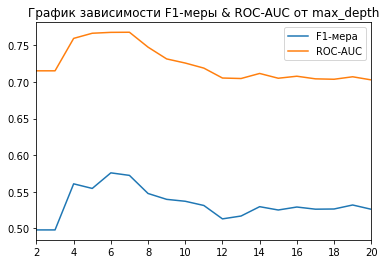

In [24]:
plt.plot(range(2,21), graph_f1_up)
plt.title('График зависимости F1-меры & ROC-AUC от max_depth')
plt.xlim(2, 20)

plt.plot(range(2, 21), graph_roc_up)
plt.legend({'F1-мера', 'ROC-AUC'});


In [25]:
# Decision Tree Classifier
graph_f1_down = []
graph_roc_down =[]
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 12345)
    model.fit(features_downsampled, target_downsampled)
    predict_valid = model.predict(features_valid)
    f1_valid = f1_score(target_valid, predict_valid)
    auc_score = roc_auc_score(target_valid, model.predict(features_valid))
    graph_f1_down.append(f1_valid)
    graph_roc_down.append(auc_score)
    print(f'Depth: {max_depth}, F1: {round(f1_valid,4)}, ROC-AUC: {round(auc_score, 4)}')

Depth: 2, F1: 0.498, ROC-AUC: 0.7152
Depth: 3, F1: 0.498, ROC-AUC: 0.7152
Depth: 4, F1: 0.5624, ROC-AUC: 0.7605
Depth: 5, F1: 0.5555, ROC-AUC: 0.7724
Depth: 6, F1: 0.5945, ROC-AUC: 0.7793
Depth: 7, F1: 0.5803, ROC-AUC: 0.7726
Depth: 8, F1: 0.5706, ROC-AUC: 0.7628
Depth: 9, F1: 0.5826, ROC-AUC: 0.7721
Depth: 10, F1: 0.5728, ROC-AUC: 0.765
Depth: 11, F1: 0.5423, ROC-AUC: 0.7455
Depth: 12, F1: 0.5357, ROC-AUC: 0.7397
Depth: 13, F1: 0.5309, ROC-AUC: 0.7368
Depth: 14, F1: 0.5174, ROC-AUC: 0.7251
Depth: 15, F1: 0.5038, ROC-AUC: 0.7148
Depth: 16, F1: 0.5075, ROC-AUC: 0.7196
Depth: 17, F1: 0.4888, ROC-AUC: 0.7029
Depth: 18, F1: 0.4917, ROC-AUC: 0.7057
Depth: 19, F1: 0.4916, ROC-AUC: 0.7049
Depth: 20, F1: 0.4916, ROC-AUC: 0.7049


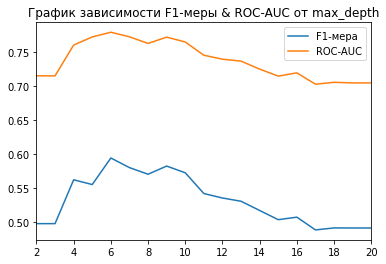

In [26]:
plt.plot(range(2,21), graph_f1_down)
plt.title('График зависимости F1-меры & ROC-AUC от max_depth')
plt.xlim(2, 20)

plt.plot(range(2, 21), graph_roc_down)
plt.legend({'F1-мера', 'ROC-AUC'});

Для лучшей визуализации построим хитмэп и посмотрим, в каком из вариантов значение оптимально.

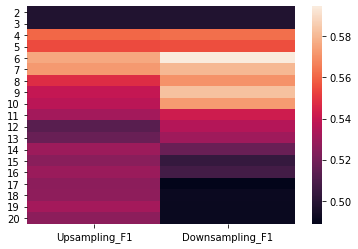

In [27]:
# Graph Decision Tree
synthesis_tree_f1 = pd.DataFrame(data = [graph_f1_up, graph_f1_down]).T
synthesis_tree_f1.columns = ['Upsampling_F1', 'Downsampling_F1']
synthesis_tree_f1.index = range(2, 21)
sns.heatmap(synthesis_tree_f1);

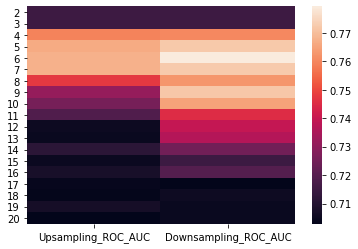

In [28]:
synthesis_tree_roc = pd.DataFrame(data = [graph_roc_up, graph_roc_down]).T
synthesis_tree_roc.columns = ['Upsampling_ROC_AUC', 'Downsampling_ROC_AUC']
synthesis_tree_roc.index = range(2, 21)
sns.heatmap(synthesis_tree_roc);

Максимальную эффективность на сбалансированной выборке модель показывает при max_depth = 6, ее F1 равна 0,5945 при более высоком ROC-AUC : 0.77. <br>
Проверим, как на сбалансированной выборке ведет себя модель Random Forest.

In [29]:
graph_f1_up = []
graph_roc_up= []
for n_est in range(10, 201, 10):    
    model = RandomForestClassifier(n_estimators = n_est, random_state = 12345)
    model.fit(features_upsampled, target_upsampled)
    predict_valid = model.predict(features_valid)
    f1_valid = f1_score(target_valid, predict_valid)
    auc_score = roc_auc_score(target_valid, model.predict(features_valid))
    graph_f1_up.append(f1_valid)
    graph_roc_up.append(auc_score)
    print(f'Estimators: {n_est}, F1: {round(f1_valid,4)}, ROC-AUC: {round(auc_score, 4)}')

Estimators: 10, F1: 0.5928, ROC-AUC: 0.7308
Estimators: 20, F1: 0.5997, ROC-AUC: 0.7384
Estimators: 30, F1: 0.6144, ROC-AUC: 0.7476
Estimators: 40, F1: 0.6209, ROC-AUC: 0.7522
Estimators: 50, F1: 0.6247, ROC-AUC: 0.7552
Estimators: 60, F1: 0.6239, ROC-AUC: 0.7549
Estimators: 70, F1: 0.6227, ROC-AUC: 0.7534
Estimators: 80, F1: 0.6288, ROC-AUC: 0.7568
Estimators: 90, F1: 0.6227, ROC-AUC: 0.7534
Estimators: 100, F1: 0.6265, ROC-AUC: 0.7538
Estimators: 110, F1: 0.6215, ROC-AUC: 0.7519
Estimators: 120, F1: 0.6197, ROC-AUC: 0.7507
Estimators: 130, F1: 0.6215, ROC-AUC: 0.7519
Estimators: 140, F1: 0.634, ROC-AUC: 0.7593
Estimators: 150, F1: 0.6305, ROC-AUC: 0.7574
Estimators: 160, F1: 0.6305, ROC-AUC: 0.7574
Estimators: 170, F1: 0.6295, ROC-AUC: 0.7565
Estimators: 180, F1: 0.6215, ROC-AUC: 0.7519
Estimators: 190, F1: 0.6233, ROC-AUC: 0.7531
Estimators: 200, F1: 0.6225, ROC-AUC: 0.7528


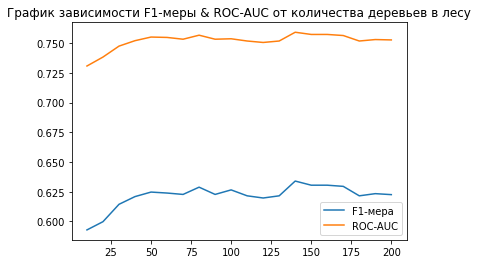

In [30]:
plt.plot(range(10, 201, 10), graph_f1_up)
plt.title('График зависимости F1-меры & ROC-AUC от количества деревьев в лесу')

plt.plot(range(10, 201, 10), graph_roc_up)
plt.legend({'F1-мера', 'ROC-AUC'});

In [31]:
graph_f1_down = []
graph_roc_down= []
for n_est in range(10, 201, 10):    
    model = RandomForestClassifier(n_estimators = n_est, random_state = 12345)
    model.fit(features_downsampled, target_downsampled)
    predict_valid = model.predict(features_valid)
    f1_valid = f1_score(target_valid, predict_valid)
    auc_score = roc_auc_score(target_valid, model.predict(features_valid))
    graph_f1_down.append(f1_valid)
    graph_roc_down.append(auc_score)
    print(f'Estimators: {n_est}, F1: {round(f1_valid,4)}, ROC-AUC: {round(auc_score, 4)}')

Estimators: 10, F1: 0.5809, ROC-AUC: 0.7647
Estimators: 20, F1: 0.5788, ROC-AUC: 0.7658
Estimators: 30, F1: 0.5787, ROC-AUC: 0.7676
Estimators: 40, F1: 0.5845, ROC-AUC: 0.7737
Estimators: 50, F1: 0.5891, ROC-AUC: 0.7768
Estimators: 60, F1: 0.5936, ROC-AUC: 0.7793
Estimators: 70, F1: 0.5989, ROC-AUC: 0.7827
Estimators: 80, F1: 0.5943, ROC-AUC: 0.7787
Estimators: 90, F1: 0.5949, ROC-AUC: 0.7805
Estimators: 100, F1: 0.596, ROC-AUC: 0.7811
Estimators: 110, F1: 0.6032, ROC-AUC: 0.7876
Estimators: 120, F1: 0.6026, ROC-AUC: 0.7873
Estimators: 130, F1: 0.607, ROC-AUC: 0.7907
Estimators: 140, F1: 0.6047, ROC-AUC: 0.7879
Estimators: 150, F1: 0.6034, ROC-AUC: 0.7882
Estimators: 160, F1: 0.6023, ROC-AUC: 0.7875
Estimators: 170, F1: 0.6028, ROC-AUC: 0.7879
Estimators: 180, F1: 0.6006, ROC-AUC: 0.7866
Estimators: 190, F1: 0.6006, ROC-AUC: 0.7866
Estimators: 200, F1: 0.6024, ROC-AUC: 0.7881


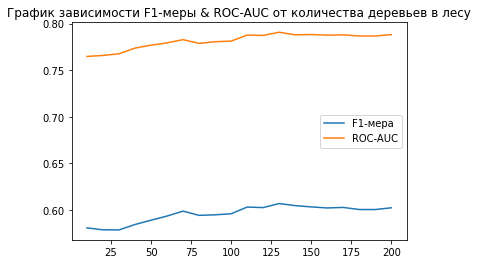

In [32]:
plt.plot(range(10, 201, 10), graph_f1_down)
plt.title('График зависимости F1-меры & ROC-AUC от количества деревьев в лесу')

plt.plot(range(10, 201, 10), graph_roc_down)
plt.legend({'F1-мера', 'ROC-AUC'});

Для лучшей визуализации построим хитмэп и посмотрим, в каком из вариантов значение оптимально.

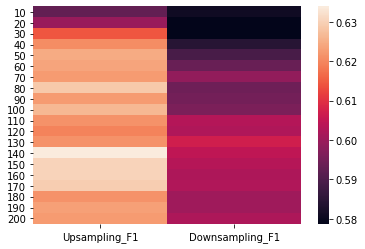

In [33]:
# Graph Random Forest
synthesis_forest_f1 = pd.DataFrame(data = [graph_f1_up, graph_f1_down]).T
synthesis_forest_f1.columns = ['Upsampling_F1', 'Downsampling_F1']
synthesis_forest_f1.index = range(10, 201, 10)
sns.heatmap(synthesis_forest_f1);

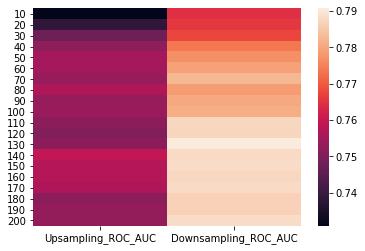

In [34]:
synthesis_forest_roc = pd.DataFrame(data = [graph_roc_up, graph_roc_down]).T
synthesis_forest_roc.columns = ['Upsampling_ROC_AUC', 'Downsampling_ROC_AUC']
synthesis_forest_roc.index = range(10, 201, 10)
sns.heatmap(synthesis_forest_roc);

Мы видим, что как и в случае с Decision Tree, после балансировки классов показатели метрик не сильно изменились, ROC_AUC в абсолютном выражении вырос. <br>
В отличие от Decision Tree, результаты Random Forest при апсемплинге и при даунсемплинге кажутся нелогичными и противоречивыми, судя по графику: для F1-меры результаты в целом выше при апсемплинге, а для ROC-AUC - при даунсемплинге. Стоит относиться с осторожностью к таким результатам и продолжать исследование балансировки классов.
 

intercept_scaling: 0.1 C-parameter: 0.1, F1: 0.5267, ROC-AUC: 0.7326
intercept_scaling: 0.1 C-parameter: 0.3, F1: 0.5227, ROC-AUC: 0.7292
intercept_scaling: 0.1 C-parameter: 0.5, F1: 0.5217, ROC-AUC: 0.7288
intercept_scaling: 0.1 C-parameter: 0.7, F1: 0.5226, ROC-AUC: 0.7295
intercept_scaling: 0.1 C-parameter: 0.9, F1: 0.5248, ROC-AUC: 0.7313
intercept_scaling: 0.3 C-parameter: 0.1, F1: 0.5239, ROC-AUC: 0.7307
intercept_scaling: 0.3 C-parameter: 0.3, F1: 0.5282, ROC-AUC: 0.7347
intercept_scaling: 0.3 C-parameter: 0.5, F1: 0.5264, ROC-AUC: 0.7334
intercept_scaling: 0.3 C-parameter: 0.7, F1: 0.526, ROC-AUC: 0.7331
intercept_scaling: 0.3 C-parameter: 0.9, F1: 0.526, ROC-AUC: 0.7331
intercept_scaling: 0.5 C-parameter: 0.1, F1: 0.5301, ROC-AUC: 0.7359
intercept_scaling: 0.5 C-parameter: 0.3, F1: 0.526, ROC-AUC: 0.7331
intercept_scaling: 0.5 C-parameter: 0.5, F1: 0.526, ROC-AUC: 0.7331
intercept_scaling: 0.5 C-parameter: 0.7, F1: 0.5242, ROC-AUC: 0.7316
intercept_scaling: 0.5 C-parameter: 0.

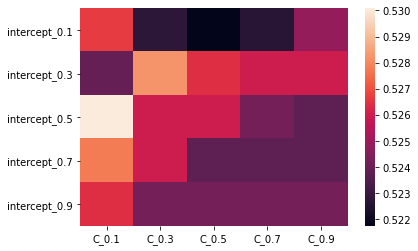

In [35]:
# Logistic regression
graph_f1_up = []
auc_graph_up = []
heatmap_graph_up = pd.DataFrame(columns = [0.1, 0.3, 0.5, 0.7, 0.9], index = [0.1, 0.3, 0.5, 0.7, 0.9])

for intercept in [0.1, 0.3, 0.5, 0.7, 0.9]:
    for c_param in [0.1, 0.3, 0.5, 0.7, 0.9]:
        model = LogisticRegression(C=c_param, intercept_scaling = intercept, solver='liblinear', random_state = 12345)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        #predicted_valid = probabilities_one_valid > threshold 
        precision = precision_score(target_valid, predicted_valid) 
        recall = recall_score(target_valid, predicted_valid) 
        f1_valid = f1_score(target_valid, predicted_valid) 
        auc_score = roc_auc_score(target_valid, predicted_valid) 
        graph_f1_up.append(f1_valid)
        auc_graph_up.append(auc_score)
        heatmap_graph_up.loc[intercept, c_param] = f1_valid
        print(f'intercept_scaling: {round(intercept, 2)} C-parameter: {round(c_param, 2)}, F1: {round(f1_valid,4)}, ROC-AUC: {round(auc_score, 4)}')
        
heatmap_graph_up = heatmap_graph_up.astype('float')
heatmap_graph_up.index = ['intercept_0.1', 'intercept_0.3', 'intercept_0.5', 'intercept_0.7', 'intercept_0.9']
heatmap_graph_up.columns = ['C_0.1', 'C_0.3', 'C_0.5', 'C_0.7', 'C_0.9']
sns.heatmap(heatmap_graph_up);


Результаты логистической регрессии для сбалансированной выборки подтверждают изначальные результаты: в целом F1-мера ниже, чем у других моделей. Максимальный результат 0,53 при intercept scaling 0.5 и "с" параметре 0.1 все равно значительно ниже, чем на других моделях. 

### Устранение дисбаланса методом подбора порога вероятности класса

Изучим результаты моделей Decision Tree & Random Forest при балансировке классов методом подбора порога вероятности класса и сравним с результатами апсемплинга / даунсемплинга.

Threshold: 0.05, F1: 0.4021, ROC-AUC: 0.62
Threshold: 0.1, F1: 0.5466, ROC-AUC: 0.76
Threshold: 0.15, F1: 0.5685, ROC-AUC: 0.77
Threshold: 0.2, F1: 0.5683, ROC-AUC: 0.76
Threshold: 0.25, F1: 0.5962, ROC-AUC: 0.77
Threshold: 0.3, F1: 0.591, ROC-AUC: 0.75
Threshold: 0.35, F1: 0.5813, ROC-AUC: 0.72
Threshold: 0.4, F1: 0.5813, ROC-AUC: 0.72
Threshold: 0.45, F1: 0.5847, ROC-AUC: 0.72
Threshold: 0.5, F1: 0.5788, ROC-AUC: 0.71
Threshold: 0.55, F1: 0.5788, ROC-AUC: 0.71
Threshold: 0.6, F1: 0.5443, ROC-AUC: 0.69
Threshold: 0.65, F1: 0.4824, ROC-AUC: 0.66
Threshold: 0.7, F1: 0.4806, ROC-AUC: 0.66
Threshold: 0.75, F1: 0.4806, ROC-AUC: 0.66
Threshold: 0.8, F1: 0.4806, ROC-AUC: 0.66
Threshold: 0.85, F1: 0.4806, ROC-AUC: 0.66
Threshold: 0.9, F1: 0.4383, ROC-AUC: 0.64
Threshold: 0.95, F1: 0.2415, ROC-AUC: 0.57


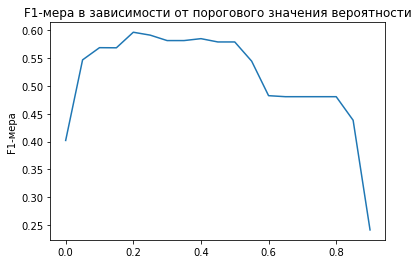

In [36]:
graph_roc_pc = []
graph_f1_pc = []
index_graph = []
ind = 1
model = DecisionTreeClassifier(max_depth = 6, random_state = 12345)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.05, 1.0, 0.05):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid, predicted_valid) 
    recall = recall_score(target_valid, predicted_valid) 
    f1_valid = 2*precision*recall/(precision+recall)
    roc_auc = roc_auc_score(target_valid, predicted_valid)
    graph_f1_pc.append(f1_valid)
    graph_roc_pc.append(roc_auc)
    ind +=1
    index_graph.append(f'Depth {round(ind,2)} | Thresh.{round(threshold, 2)}')
    print(f'Threshold: {round(threshold, 2)}, F1: {round(f1_valid,4)}, ROC-AUC: {round(roc_auc, 2)}')
    
plt.plot(np.arange(0, 0.95, 0.05), graph_f1_pc)
plt.ylabel('F1-мера')
plt.title('F1-мера в зависимости от порогового значения вероятности');

Сравним эти значения с хитмэпом апсемплинга / даунсемплинга. <br>
***Важно!*** Левая и центральная колонка хитмапа имеют одну и ту же размерность - глубину (от 2 до 20), а правая колонка имеет другую размерность - порог вероятности класса при стабильной глубине 6 (порог от 0.05 до 0.95 с шагом 0.05). 

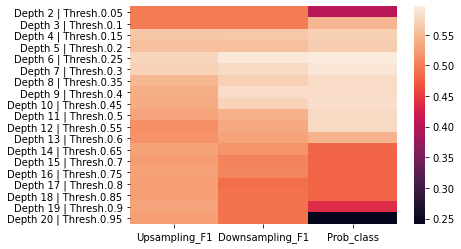

In [37]:
# Graph Decision Tree
synthesis_tree_f1['Prob_class'] = graph_f1_pc
synthesis_tree_f1.index = index_graph
sns.heatmap(synthesis_tree_f1);

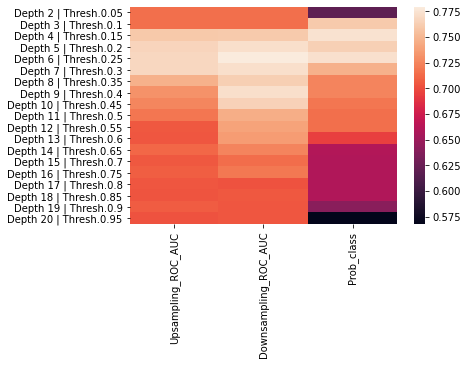

In [38]:
synthesis_tree_roc['Prob_class'] = graph_roc_pc
synthesis_tree_roc.index = index_graph
sns.heatmap(synthesis_tree_roc);

На графике видно, что F1 мера имеет максимальное значение при методе подбора вероятности (и глубине 6) с порогом вероятности в 0.25. Результат составляет 0,596. Но ROC_AUC в то же время выше при методе даунсемплинга. Это противоречивые данные, поэтому необходимо также проверить модель Random Forest.

Threshold: 0.0, F1: 0.3495
Threshold: 0.05, F1: 0.4227
Threshold: 0.1, F1: 0.4952
Threshold: 0.15, F1: 0.5565
Threshold: 0.2, F1: 0.5946
Threshold: 0.25, F1: 0.6236
Threshold: 0.3, F1: 0.6415
Threshold: 0.35, F1: 0.6428
Threshold: 0.4, F1: 0.6398
Threshold: 0.45, F1: 0.6417
Threshold: 0.5, F1: 0.6053
Threshold: 0.55, F1: 0.5851
Threshold: 0.6, F1: 0.5682
Threshold: 0.65, F1: 0.5545
Threshold: 0.7, F1: 0.5198
Threshold: 0.75, F1: 0.483
Threshold: 0.8, F1: 0.4106
Threshold: 0.85, F1: 0.3093
Threshold: 0.9, F1: 0.1155
Threshold: 0.95, F1: 0.0194


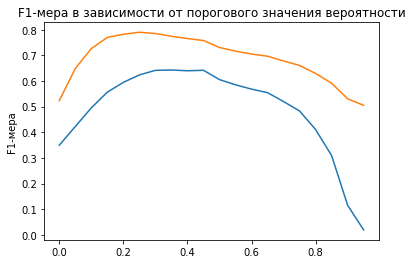

In [39]:
graph_f1_pc=[]
graph_roc_pc =[]
ind = 0
index_graph = []
model = RandomForestClassifier(n_estimators = 130, random_state = 12345)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
for threshold in np.arange(0, 1, 0.05):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid, predicted_valid) 
    recall = recall_score(target_valid, predicted_valid) 
    f1_valid = f1_score(target_valid, predicted_valid)
    auc_score = roc_auc_score(target_valid, predicted_valid)
    ind += 10
    index_graph.append(f'N_est {round(ind,2)} | Thresh.{round(threshold, 2)}')
    graph_f1_pc.append(f1_valid)
    graph_roc_pc.append(auc_score)
    print(f'Threshold: {round(threshold, 2)}, F1: {round(f1_valid,4)}')
    
plt.plot(np.arange(0, 1, 0.05), graph_f1_pc)
plt.plot(np.arange(0, 1, 0.05), graph_roc_pc)
plt.ylabel('F1-мера')
plt.title('F1-мера в зависимости от порогового значения вероятности');

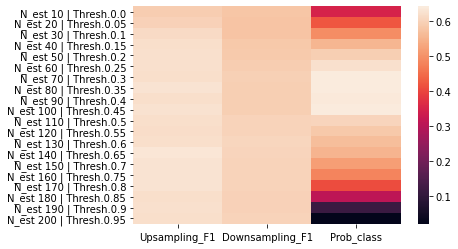

In [40]:
#Random Forest
synthesis_forest_f1['Prob_class'] = graph_f1_pc
synthesis_forest_f1.index = index_graph
sns.heatmap(synthesis_forest_f1);


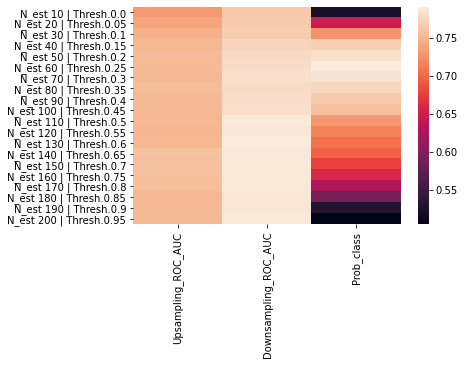

In [41]:
synthesis_forest_roc['Prob_class'] = graph_roc_pc
synthesis_forest_roc.index = index_graph
sns.heatmap(synthesis_forest_roc);

По графикам отчетливо видно, что наилучшие результаты и по F1, и по ROC-AUC дает метод подбора вероятностей при количестве эстиматоров 130 и пороге вероятности в 0,25. Данные отднозначны, а это говорит о том, что именно эта модель дает наилучший прогноз.

## Тестирование модели

Протестируем модель Random Forest (n_estimators = 130, порог вероятности = 0,25) на тестовой выборке.

In [42]:
model = RandomForestClassifier(n_estimators = 130, random_state = 12345)
model.fit(features_train, target_train)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > 0.25
f1_valid = f1_score(target_test, predicted_test)
auc_score = roc_auc_score(target_test, predicted_test)

print(f'F1: {round(f1_valid,4)}, ROC-AUC: {round(auc_score, 4)}')

F1: 0.5968, ROC-AUC: 0.7661


На тестовой выборке модель показала аналогично хороший результат F1, который немного выше 0,590, и относительно высокий ROC_AUC = 0.766, а это значит, что эта модель удовлетворяет всем необхоидмым условиям.

## Вывод

Мы обучили различные модели на различных гиперпараметрах, с учетом и без учета балансировки классов. Опытным путем мы выявили, что оптимальным для прогнозирования является использование модели Random Forest с n_estimators = 130 при балансировке классов методом подбора порога вероятности.<br>
На тестовой выборке эта модель хорошо проявила себя:<br>
F1-мера : 0.597<br>
RОC-AUC: 0.766 <br>
При таких показателях мы сможем предсказать не менее 60% клиентов, которые готовы уйти из банка, и заблаговременно принять меры.